In [26]:
from rdkit import Chem
from rdkit.Chem import AllChem
import os
import pandas as pd
from parameteriser import runner
import parmed

In [27]:
parm = runner.FF_Generator("O=C([C@@H](NC(C)=O)CCCCN1C=C(N=N1)C[C@@H](C(NC)=O)NC(C)=O)NC")

Treating your residue as a stapled residue


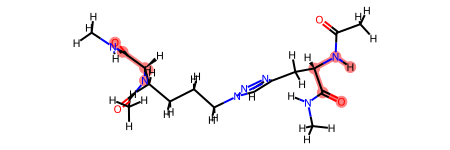

In [28]:
parm.mol

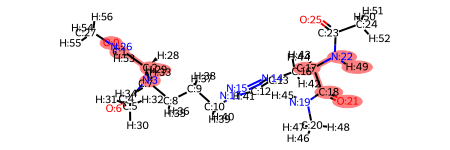

In [29]:
for i, atom in enumerate(parm.mol.GetAtoms()):
    atom.SetProp("molAtomMapNumber", str(atom.GetIdx()))

parm.mol

In [30]:
capping_list = parm.capping_list
backbone_list = parm.backbone_list
sidechain_list = parm.sidechain_list

mol = parm.mol

In [31]:
confs = AllChem.EmbedMultipleConfs(mol, numConfs=1, randomSeed=-1)
rmslist = []
AllChem.AlignMolConformers(mol, RMSlist=rmslist)
res = AllChem.MMFFOptimizeMoleculeConfs(mol, maxIters=1000)

parmed_mol = parmed.load_rdkit(mol)

In [32]:
filename = 'residue_resp_charges.csv' # point towards the file with the RESP charges for the stapled residue

df = pd.read_csv(filename)

charge_array = df.iloc[:, 1].to_numpy()

charges_list = charge_array.tolist()

In [34]:
parmed_mol.save('capped_staple_no_charges.pdb')

In [35]:
os.system("antechamber -i capped_staple_no_charges.pdb -fi pdb -o capped_staple_no_charges.mol2 -fo mol2 -at gaff2 -rn MOL")


Welcome to antechamber 17.3: molecular input file processor.

acdoctor mode is on: check and diagnosis problems in the input file.
-- Check Format for pdb File --
   Status: pass
-- Check Unusual Elements --
   Status: pass
-- Check Open Valences --
   Status: pass
-- Check Geometry --
      for those bonded   
      for those not bonded   
   Status: pass
-- Check Weird Bonds --
   Status: pass
-- Check Number of Units --
   Status: pass
acdoctor mode has completed checking the input file.




0

In [36]:
colnames = ['index', 'atom_id', 'x', 'y', 'z', 'atom_type', '#', 'unit', 'charge']

In [37]:
n_atoms = mol.GetNumAtoms()
assert len(charges_list) == n_atoms

In [38]:
molecule_no_charges = pd.read_csv('capped_staple_no_charges.mol2', names=colnames, delimiter='\s+')
molecule_no_charges[6:6+n_atoms]

,index,atom_id,x,y,z,atom_type,#,unit,charge
6,1,O1,5.7760,2.1560,0.7690,o,1,MOL,0.000000
7,2,C1,5.4000,1.4510,-0.1670,c,1,MOL,0.000000
8,3,C2,4.9090,0.0040,0.0440,c3,1,MOL,0.000000
9,4,N1,5.6150,-0.5320,1.2020,ns,1,MOL,0.000000
10,5,C3,6.7930,-1.2240,1.0240,c,1,MOL,0.000000
11,6,C4,7.5450,-1.4980,2.2980,c3,1,MOL,0.000000
12,7,O2,7.2050,-1.5880,-0.0730,o,1,MOL,0.000000
13,8,C5,3.3910,0.0140,0.2650,c3,1,MOL,0.000000
14,9,C6,2.8050,-1.4010,0.3230,c3,1,MOL,0.000000
15,10,C7,1.3080,-1.4260,0.6420,c3,1,MOL,0.000000


In [39]:
molecule_no_charges['charge'][6:6+n_atoms] = charges_list
molecule_no_charges.to_csv('capped_staple_charges.mol2', sep = '\t', index=False, header=False)

In [41]:
!parmchk2 -i capped_staple_charges_mod.mol2 -f mol2 -o staple_name_gaff2.frcmod -a Y -p /home/eva/anaconda3/envs/AmberTools22/dat/leap/parm/gaff2.dat

# change the path to the GAFF2 force field based on your conda installation

# note that here we use a modified mol2 file where the nd and cd atom types have been changed to 
# their equivalent nc and cc atom types respectively, for simplicity

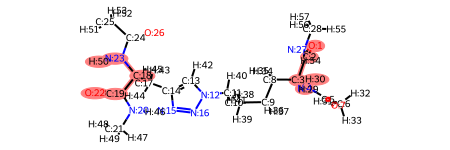

In [42]:
for i, atom in enumerate(mol.GetAtoms()):
    atom.SetProp("molAtomMapNumber", str(atom.GetIdx()+1))

mol

In [44]:
resname = "SC1" # residue name for the first part of the staple, S denotes an S-conformer

In [45]:
atom1_idx = 10
atom2_idx = 11

# Traverse to get all atoms connected to atom2, excluding atom1
visited = set()

def traverse(atom_idx, exclude_idx):
    """Recursive traversal to collect connected atom indices."""
    if atom_idx in visited:
        return
    visited.add(atom_idx)
    atom = mol.GetAtomWithIdx(atom_idx)
    for neighbor in atom.GetNeighbors():
        neighbor_idx = neighbor.GetIdx()
        if neighbor_idx != exclude_idx:  # Avoid going back to the excluded atom
            traverse(neighbor_idx, exclude_idx)

traverse(atom2_idx, atom1_idx)

# Exclude the atom from which the traversal began if needed
visited_after_bond = visited - {atom1_idx}

visited_after_bond_list = list(visited_after_bond)
visited_after_bond_list

[11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52]

In [46]:
remove_list_res1 = [item for item in visited_after_bond_list if item not in capping_list]
remove_list_res1

[11, 12, 13, 14, 15, 16, 17, 18, 21, 22, 41, 42, 43, 44, 49]

In [47]:
tleapinput = open("tleap.in", "w")

tleapinput.write(f"{resname}  = loadmol2 capped_staple_charges_mod.mol2 \n")
tleapinput.write("set %s head %s.1.N1 \n" % (resname, resname))
tleapinput.write("set %s tail %s.1.C1 \n" % (resname, resname))
for atom in capping_list:
    tleapinput.write("remove %s %s.1.%s\n" % (resname, resname, atom + 1))
for atom in remove_list_res1:
    tleapinput.write("remove %s %s.1.%s\n" % (resname, resname, atom + 1))
tleapinput.write("check %s \n" % (resname))
tleapinput.write("saveoff  %s %s.lib \n" % (resname, resname))
tleapinput.write("quit")
tleapinput.close()

os.system("tleap -f tleap.in")

-I: Adding /home/eva/anaconda3/envs/qm_resp_3.8/dat/leap/prep to search path.
-I: Adding /home/eva/anaconda3/envs/qm_resp_3.8/dat/leap/lib to search path.
-I: Adding /home/eva/anaconda3/envs/qm_resp_3.8/dat/leap/parm to search path.
-I: Adding /home/eva/anaconda3/envs/qm_resp_3.8/dat/leap/cmd to search path.
-f: Source tleap.in.

Welcome to LEaP!
(no leaprc in search path)
Sourcing: ./tleap.in
Loading Mol2 file: ./capped_staple_charges_mod.mol2
Reading MOLECULE named MOL								
Checking 'SC1'....

/home/eva/anaconda3/envs/qm_resp_3.8/bin/teLeap: Warning!
The unperturbed charge of the unit (0.090506) is not integral.

/home/eva/anaconda3/envs/qm_resp_3.8/bin/teLeap: Warning!
The unperturbed charge of the unit (0.090506) is not zero.
Checking parameters for unit 'SC1'.
Checking for bond parameters.
Checking for angle parameters.

/home/eva/anaconda3/envs/qm_resp_3.8/bin/teLeap: Error!
Could not find angle parameter: o - c - c3

/home/eva/anaconda3/envs/qm_resp_3.8/bin/teLeap: Error!
Cou

0

In [48]:
resname = "SC2" # residue name for the second part of the staple, S denotes an S-conformer

In [49]:
atom1_idx = 10
atom2_idx = 11

# Traverse to get all atoms connected to atom1, excluding atom2
visited = set()

def traverse(atom_idx, exclude_idx):
    """Recursive traversal to collect connected atom indices."""
    if atom_idx in visited:
        return
    visited.add(atom_idx)
    atom = mol.GetAtomWithIdx(atom_idx)
    for neighbor in atom.GetNeighbors():
        neighbor_idx = neighbor.GetIdx()
        if neighbor_idx != exclude_idx:  # Avoid going back to the excluded atom
            traverse(neighbor_idx, exclude_idx)

# Start traversal from atom1, excluding atom2
traverse(atom1_idx, atom2_idx)

# Exclude the atom connected by the bond if necessary
visited_before_bond = visited - {atom2_idx}

visited_before_bond_list = list(visited_before_bond)
visited_before_bond_list


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 53,
 54,
 55,
 56]

In [50]:
remove_list_res2 = [item for item in visited_before_bond_list if item not in capping_list]
remove_list_res2

[0, 1, 2, 3, 7, 8, 9, 10, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40]

In [51]:
tleapinput = open("tleap.in", "w")

tleapinput.write(f"{resname}  = loadmol2 capped_staple_charges_mod.mol2 \n")
tleapinput.write("set %s head %s.1.N6 \n" % (resname, resname))
tleapinput.write("set %s tail %s.1.C13 \n" % (resname, resname))
for atom in capping_list:
    tleapinput.write("remove %s %s.1.%s\n" % (resname, resname, atom + 1))
for atom in remove_list_res2:
    tleapinput.write("remove %s %s.1.%s\n" % (resname, resname, atom + 1))
tleapinput.write("check %s \n" % (resname))
tleapinput.write("saveoff  %s %s.lib \n" % (resname, resname))
tleapinput.write("quit")
tleapinput.close()

os.system("tleap -f tleap.in")

-I: Adding /home/eva/anaconda3/envs/qm_resp_3.8/dat/leap/prep to search path.
-I: Adding /home/eva/anaconda3/envs/qm_resp_3.8/dat/leap/lib to search path.
-I: Adding /home/eva/anaconda3/envs/qm_resp_3.8/dat/leap/parm to search path.
-I: Adding /home/eva/anaconda3/envs/qm_resp_3.8/dat/leap/cmd to search path.
-f: Source tleap.in.

Welcome to LEaP!
(no leaprc in search path)
Sourcing: ./tleap.in
Loading Mol2 file: ./capped_staple_charges_mod.mol2
Reading MOLECULE named MOL								
Checking 'SC2'....

/home/eva/anaconda3/envs/qm_resp_3.8/bin/teLeap: Warning!
The unperturbed charge of the unit (-0.047405) is not integral.

/home/eva/anaconda3/envs/qm_resp_3.8/bin/teLeap: Warning!
The unperturbed charge of the unit (-0.047405) is not zero.
Checking parameters for unit 'SC2'.
Checking for bond parameters.
Checking for angle parameters.

/home/eva/anaconda3/envs/qm_resp_3.8/bin/teLeap: Error!
Could not find angle parameter: na - cc - cc

/home/eva/anaconda3/envs/qm_resp_3.8/bin/teLeap: Error!

0